# Generate synthetic ARMA data for training Convolutional Neural Network

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
arparams = np.array([0.9824, -0.3722])
arparams = np.r_[1, -arparams]
maparams = np.array([1])

In [6]:
generated_arma_sample = arma_generate_sample(arparams, maparams, 300)

In [7]:
type(generated_arma_sample)

numpy.ndarray

In [8]:
generated_arma_sample_df = pd.DataFrame(generated_arma_sample)

<AxesSubplot:>

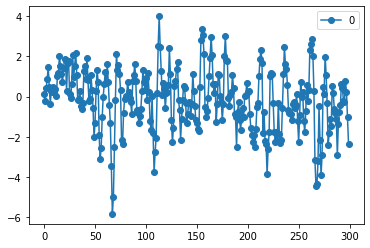

In [9]:
generated_arma_sample_df.plot(marker='o')

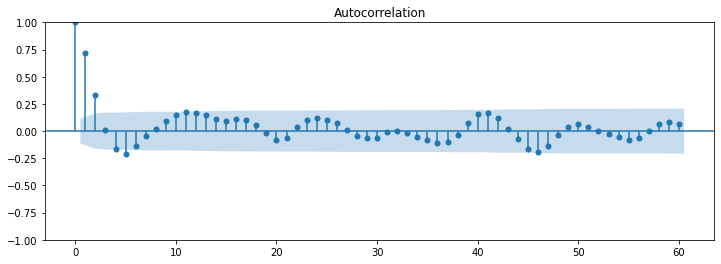

In [10]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_acf(generated_arma_sample_df, lags=60, ax=ax)

/Users/tadatoshi/.pyenv/versions/3.10.5/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


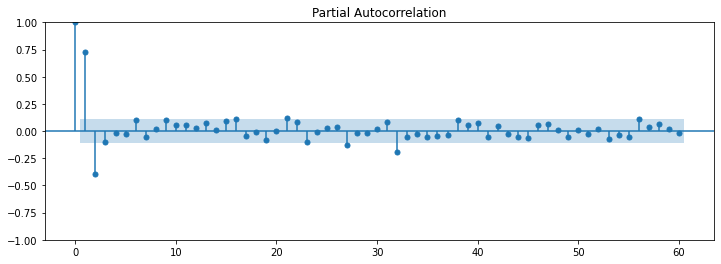

In [11]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_pacf(generated_arma_sample_df, lags=60, ax=ax)

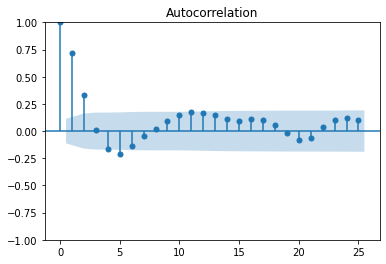

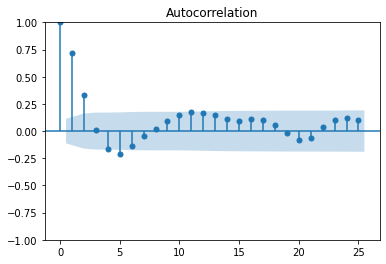

In [12]:
sm.graphics.tsa.plot_acf(generated_arma_sample_df)

In [13]:
generated_arma_sample_2 = arma_generate_sample(arparams, maparams, 300)

In [14]:
generated_arma_sample_df_2 = pd.DataFrame(generated_arma_sample_2)

<AxesSubplot:>

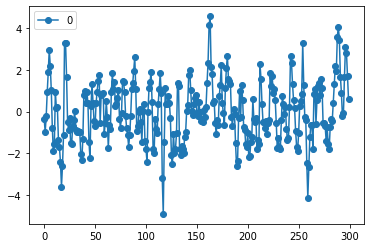

In [15]:
generated_arma_sample_df_2.plot(marker='o')

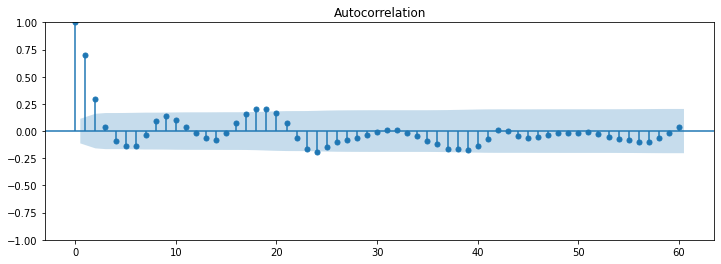

In [16]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_acf(generated_arma_sample_df_2, lags=60, ax=ax)

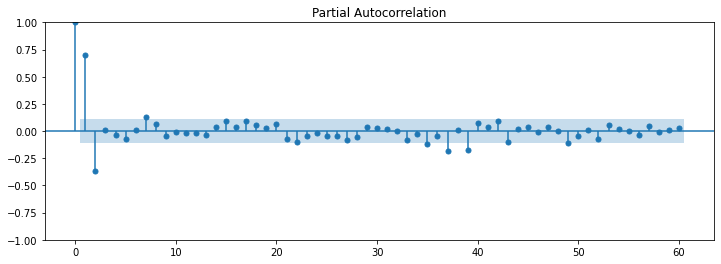

In [17]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_pacf(generated_arma_sample_df_2, lags=60, ax=ax)

(-3.0250000000000004, 63.525, -1.0, 1.0)

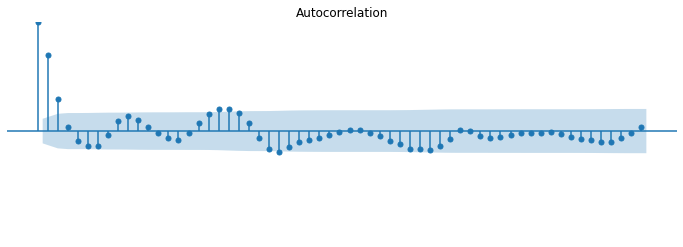

In [18]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
_ = sm.graphics.tsa.plot_acf(generated_arma_sample_df_2, lags=60, ax=ax)
plt.axis('off')

In [19]:
from time_series_plot_auto_analysis.acf_pacf.plotting import AcfPlottingUtil

In [20]:
acf_plotting_util = AcfPlottingUtil()

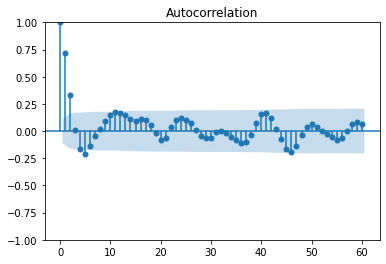

In [21]:
acf_plotting_util.plot_and_save(generated_arma_sample_df, 
    "../plots/generated_arma_sample_acf_1.png", lags=60)

In [22]:
from time_series_plot_auto_analysis.acf_pacf.plotting import PacfPlottingUtil

In [23]:
pacf_plotting_util = PacfPlottingUtil()

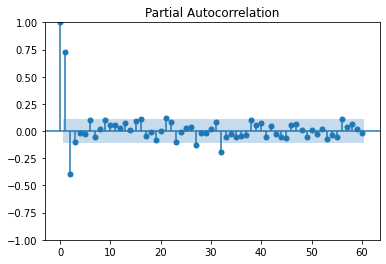

In [24]:
pacf_plotting_util.plot_and_save(generated_arma_sample_df, 
    "../plots/generated_arma_sample_pacf_1.png", lags=60)

In [25]:
from time_series_plot_auto_analysis.acf_pacf.synthetic import SyntheticAcfPacfPlot

In [26]:
synthetic_acf_pacf_plot = SyntheticAcfPacfPlot()

In [27]:
synthetic_acf_pacf_plot.generate(number_of_plots=1, arparams=[0.9824, -0.3722])

In [29]:
synthetic_acf_pacf_plot.generate(number_of_plots=100, arparams=[0.9824, -0.3722])

### Generate nonstationary data (with trend)

In [30]:
from time_series_plot_auto_analysis.acf_pacf.synthetic_trend_nonstationary \
    import TrendNonstationaryAcfPacfPlot 

In [31]:
trend_nonstationary_acf_pacf_plot = TrendNonstationaryAcfPacfPlot()

In [32]:
trend_nonstationary_acf_pacf_plot.generate(number_of_plots=1, arparams=[0.9824, -0.3722])

In [33]:
trend_nonstationary_acf_pacf_plot.generate(number_of_plots=100, arparams=[0.9824, -0.3722])

### Generate nonstationary data (with seasonality)

In [68]:
from time_series_plot_auto_analysis.acf_pacf.calculation \
    import add_synthetic_seasonality, generate_fourier_basis

In [71]:
arma_with_seasonality_df = add_synthetic_seasonality(
            generated_arma_sample_df, 50, 3)

<AxesSubplot:>

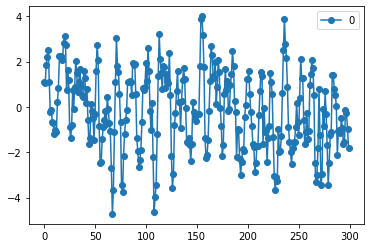

In [72]:
arma_with_seasonality_df.plot(marker='o')

In [69]:
fourier_basis = generate_fourier_basis(np.arange(100), p=50)

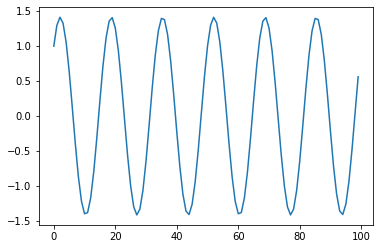

In [70]:
plt.plot(fourier_basis)

In [53]:
fourier_basis.shape

(100,)

In [60]:
x_1 = 2 * np.pi * 3 * np.arange(100) / 50

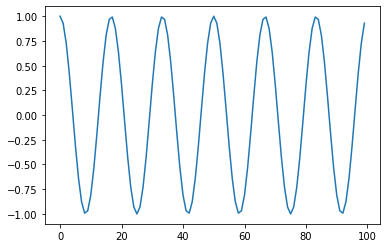

In [63]:
plt.plot(np.cos(x_1))

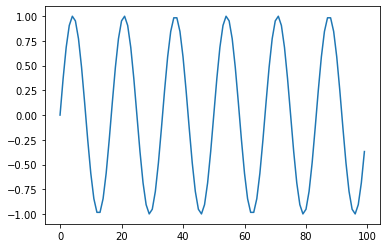

In [64]:
plt.plot(np.sin(x_1))

In [73]:
from time_series_plot_auto_analysis.acf_pacf.synthetic_seasonality_nonstationary \
    import SeasonalityNonstationaryAcfPacfPlot

In [74]:
seasonality_nonstationary_acf_pacf_plot = SeasonalityNonstationaryAcfPacfPlot()

In [75]:
seasonality_nonstationary_acf_pacf_plot.generate(number_of_plots=1, arparams=[0.9824, -0.3722])

/Users/tadatoshi/.pyenv/versions/3.10.5/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


In [76]:
seasonality_nonstationary_acf_pacf_plot.generate(number_of_plots=100, arparams=[0.9824, -0.3722])